# Customer segmentation (Clustering)

# Alisha_Dsouza_Clustering

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
Customers = pd.read_csv("C:\\Users\\Alisha\\Downloads\\Customers.csv")
Products = pd.read_csv("C:\\Users\\Alisha\\Downloads\\Products.csv")
Transactions = pd.read_csv("C:\\Users\\Alisha\\Downloads\\Transactions.csv")

In [35]:
import nbimporter

# Import the EDA and Lookalike notebook
import Alisha_Dsouza_EDA
import Alisha_Dsouza_Lookalike 

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]
   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44

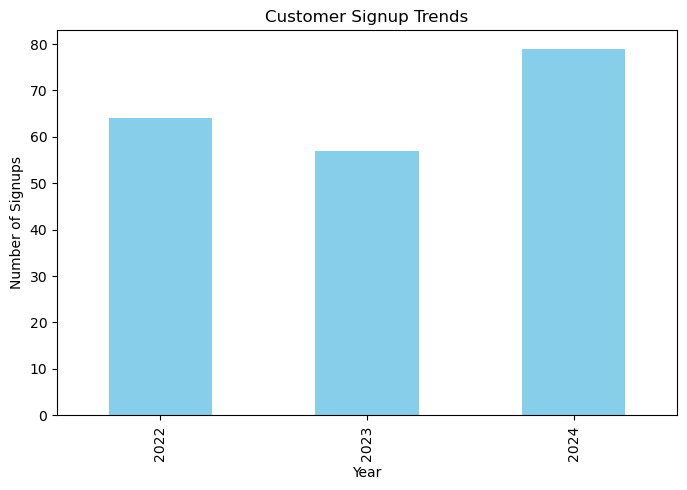

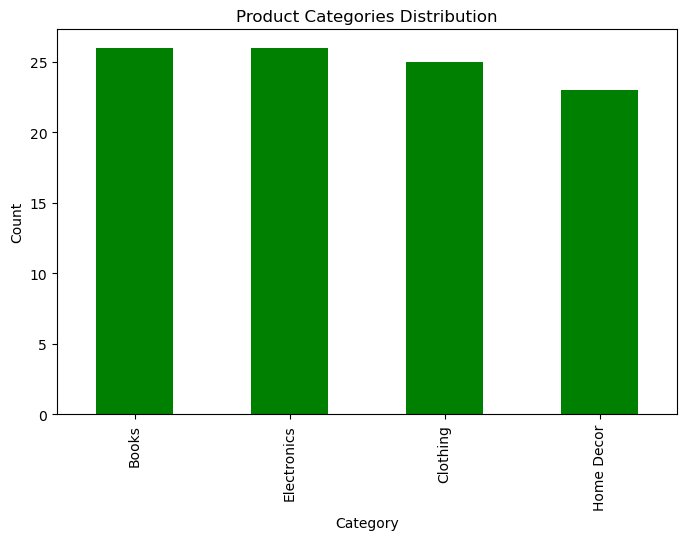

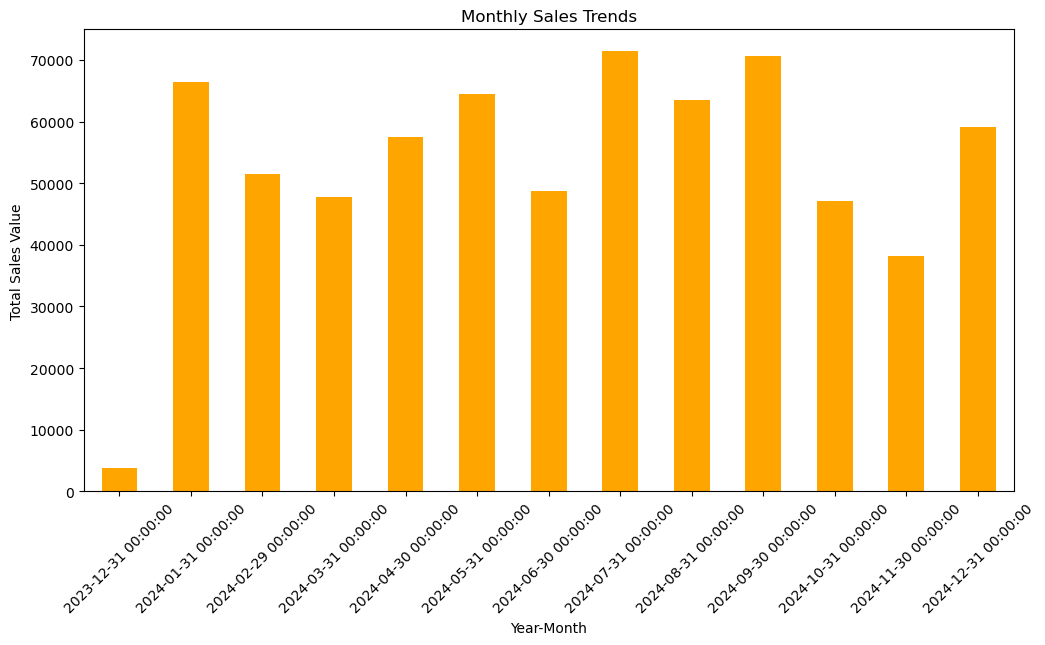

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region SignupDate  \
0      300.68  300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68  300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68  300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36  300.68  Travis Campbell  South America 2024-04-11   
4      902.04  300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  
0  ComfortLiving Bluetooth Speaker  Electronics  
1  ComfortLiving Bluetooth Speaker  Electronics  
2  ComfortLiving Blu

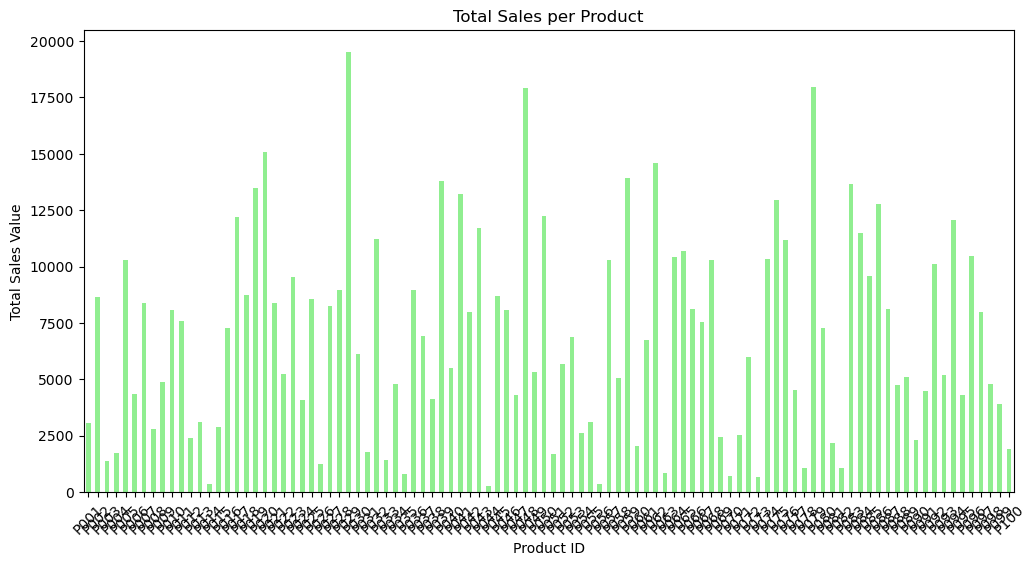

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


AttributeError: module 'Alisha_Dsouza_EDA' has no attribute 'merged_data'

AttributeError: module 'Alisha_Dsouza_EDA' has no attribute 'merged_data'

In [38]:
# Run the notebooks
%run Alisha_Dsouza_EDA.ipynb
%run Alisha_Dsouza_Lookalike.ipynb



In [46]:
#data preparation
cluster_features = merged_data.groupby('CustomerID')[['TotalValue', 'Quantity', 'Price']].sum()

In [47]:
#scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cluster_features)


In [48]:
#kmeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)


C:\Users\Alisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
# Add cluster labels to the data
cluster_features['Cluster'] = cluster_labels

In [50]:

# PCA for Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


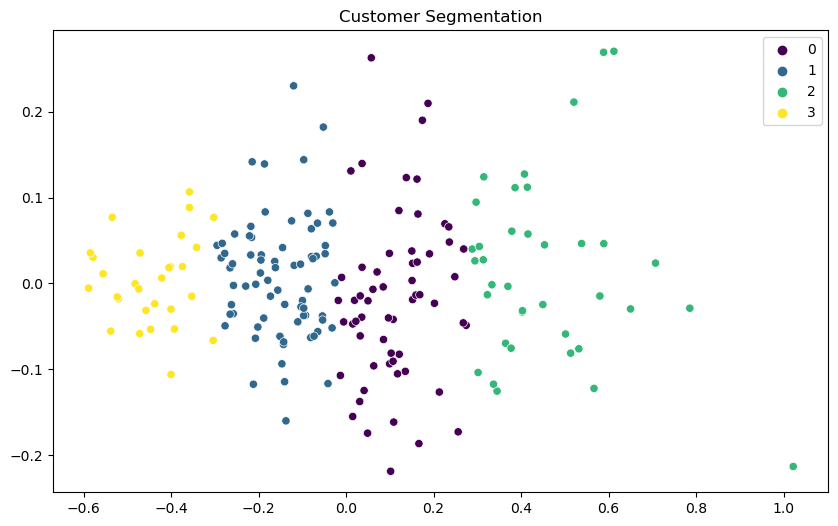

In [45]:

# Plot the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette='viridis')
plt.title("Customer Segmentation")
plt.show()